In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ba-test

/Users/austinmcdonald/Desktop/data/Fluo4/8-18-16/fluo4-ba-test


In [3]:
os.listdir()

['.DS_Store',
 'Ba-0.csv',
 'Ba-1.csv',
 'Ba-2.csv',
 'Ba-3.csv',
 'Ba-4.csv',
 'Ba-5.csv',
 'Ba-6.csv',
 'Ba-7.csv',
 'Ba-8.csv',
 'Ba-9.csv',
 'BAPTA-0.csv',
 'BAPTA-1.csv',
 'BAPTA-2.csv',
 'BAPTA-3.csv',
 'BAPTA-9.csv',
 'CCD-noise.csv',
 'water.csv']

In [4]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
Badat = datass[0:10]

In [5]:
data = dict()
dataf= dict()
datacut = dict()
intensity = dict()
leng = len(Badat)
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
water = pd.read_csv('water.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
for x in range(0,leng):
    data[x] = pd.read_csv(Badat[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data[x]['dif'] = data[x]['sig'].diff().abs()
    data[x]['BS'] = (data[x]['sig']-water['sig'])
    dataf[x] = data[x][data[x]['dif']<.01]
    datacut[x] = dataf[x][(dataf[x]['wave']>490) & (dataf[x]['wave']<700)]
    intensity[x] = integrate.trapz(datacut[x]['BS'], datacut[x]['wave'])



In [6]:
intensity[8]/intensity[0]

85.220049917110643

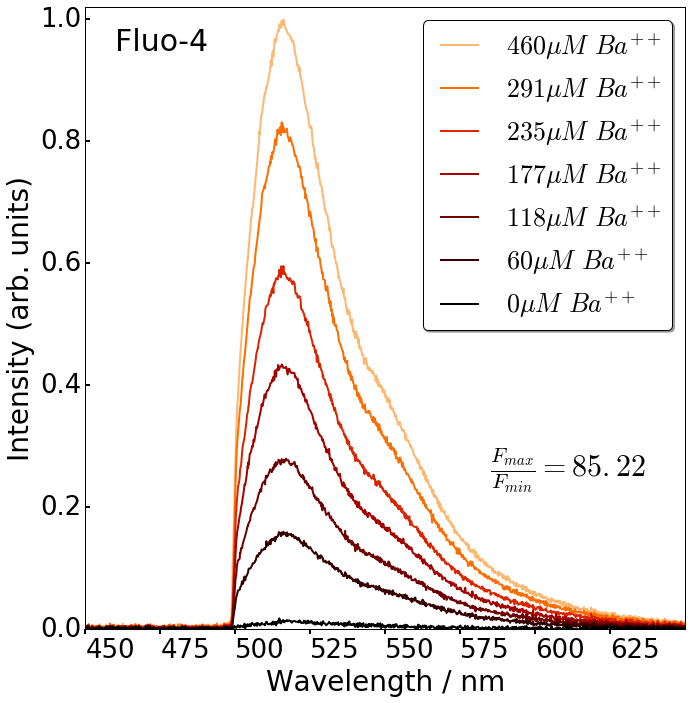

In [11]:
plt.figure(figsize=(10,10))
nor = max(dataf[8]['BS'])

plt.plot(dataf[8]['wave'],dataf[8]['BS']/nor,color=cm.gist_heat(6/7),label= r'$460 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[5]['wave'],dataf[5]['BS']/nor,color=cm.gist_heat(5/7),label= r'$291 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[4]['wave'],dataf[4]['BS']/nor,color=cm.gist_heat(4/7),label= r'$235 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[3]['wave'],dataf[3]['BS']/nor,color=cm.gist_heat(3/7),label= r'$177 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[2]['wave'],dataf[2]['BS']/nor,color=cm.gist_heat(2/7),label= r'$118 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[1]['wave'],dataf[1]['BS']/nor,color=cm.gist_heat(1/7),label= r'$60 \mu M$'+' $Ba^{++}$',linewidth=2)
plt.plot(dataf[0]['wave'],dataf[0]['BS']/nor,color=cm.gist_heat(0/7),label= r'$0 \mu M$'+' $Ba^{++}$',linewidth=2)

plt.text(460, .95, 'Fluo-4', fontsize=30)
plt.text(585, .25, r'$\frac{F_{max}}{F_{min}} = 85.22$', fontsize=30)
plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Barium Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo4_ba_IF.pdf')
plt.show()

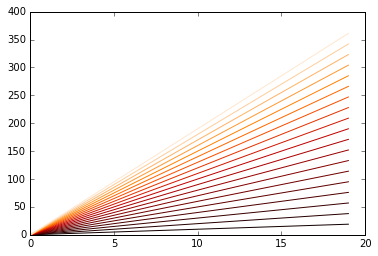

In [8]:
a = np.arange(0,20)

plt.figure()
for i in np.arange(20):
    c = cm.gist_heat(i/20)
    plt.plot(a,i*a,color=c)

plt.show()

In [32]:
inte = []
for a in range(0,10):
    inte.append(intensity[a])
inte
Fmax=max(inte)
Fmin=min(inte)
Fs = np.array((inte-Fmin)/(Fmax-inte))
Fs

array([   0.        ,    0.17617365,    0.37340872,    0.73935293,
          1.40707685,    4.54386354,   31.11162494,   70.21395014,
                 inf,  137.26384999])

In [22]:
xes = list(range(10))
bacon = []
for f in range(len(xes)):
    bacon.append((5.95e-3)*(5e-6)/(500e-6+(5e-6*xes[f])))
finalcon=np.array(np.cumsum(bacon)/1e-6)
finalcon = np.append(0,finalcon)
finalcon = finalcon[0:len(finalcon)-1]
finalcon

array([   0.        ,   59.5       ,  118.41089109,  176.74422442,
        234.51121471,  291.72275318,  348.38941984,  404.52149531,
        460.12897195,  515.22156454])

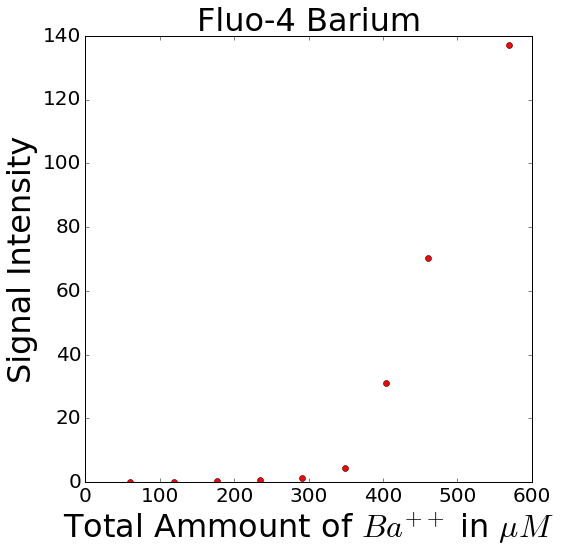

In [12]:
plt.figure(figsize=(8,8))
plt.plot(finalcon,Fs,'ro')
plt.xlabel(r'Total Ammount of $Ba^{++}$ in $\mu M$', fontsize=32)
plt.ylabel('Signal Intensity', fontsize=32)
plt.title('Fluo-4 Barium', fontsize=32)
plt.tick_params(labelsize=20)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/Fluo4/Fluo4 Bakd.pdf')
plt.show()

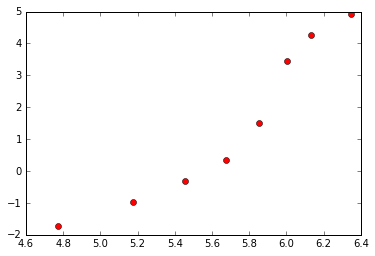

In [13]:
plt.plot(np.log(finalcon),np.log(Fs),'ro')

In [31]:
ys

array([-1.73628513, -0.9850817 , -0.30197989,  0.3415144 ,  1.51377765,
        3.43758154,  4.25154701,  4.92190499])

In [47]:
ys =np.log(Fs)
ys = np.delete(ys,[0,8,7,9,6,5])
xs =np.log(finalcon)
xs = np.delete(xs,[0,8,7,9,6,5])
fit = np.polyfit(xs,ys,1)
fun = np.poly1d(fit)
kd = np.exp(fun[0])/1e-9
kd

3042.6397560123428

(4, 7)

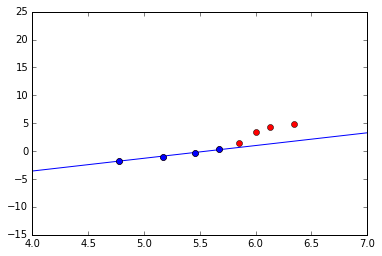

In [48]:
xvals = np.linspace(1.0, 15.0, num=500, endpoint=True)
plt.plot(xvals,(fun[1]*xvals+fun[0]))
plt.plot(np.log(finalcon),np.log(Fs),'ro')
plt.plot(xs,ys,'bo')

plt.xlim(4,7)

In [28]:
freeBa = kd*Fs
freeBa

array([  0.00000000e+00,   3.66779209e-12,   7.77406581e-12,
         1.53927267e-11,   2.92941957e-11,   9.45995434e-11,
         6.47718728e-10,   1.46179734e-09,              inf,
         2.85772172e-09])